<h6>Project Title</h6>
"Predicting Heatwave Intensity and Duration Using Historical Climate Data"
<h6>Problem Statement</h6>
Heatwaves are becoming more frequent and severe due to climate change, causing health hazards, environmental stress, and socio-economic impacts. Currently, there is limited ability to accurately predict the intensity and duration of upcoming heatwaves in different cities, making it difficult for authorities and citizens to prepare effectively.
<h6>Project Description</h6>
This project uses historical climate data (temperature, apparent temperature, precipitation, wind speed) to predict heatwave intensity and duration using machine learning models. Classification models (Decision Tree, Random Forest) are used for intensity, and regression models predict duration.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import joblib

In [2]:
# Importing Dataset
df = pd.read_excel(r'india_2004_2024_daily_weather.xlsx')
df.head()

,city,date,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,wind_speed_10m_max
0,Delhi,2004-01-01,17.6,5.0,16.9,3.5,0.0,0.0,8.8
1,Delhi,2004-01-02,17.8,5.3,16.0,3.4,0.0,0.0,10.8
2,Delhi,2004-01-03,16.7,6.3,14.6,4.1,0.0,0.0,12.2
3,Delhi,2004-01-04,15.8,4.2,13.3,1.5,0.0,0.0,12.3
4,Delhi,2004-01-05,15.4,5.2,14.3,3.1,0.0,0.0,9.6


In [3]:
# Basic Info
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89859 entries, 0 to 89858
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   city                      89859 non-null  object        
 1   date                      89859 non-null  datetime64[ns]
 2   temperature_2m_max        89859 non-null  float64       
 3   temperature_2m_min        89859 non-null  float64       
 4   apparent_temperature_max  89859 non-null  float64       
 5   apparent_temperature_min  89859 non-null  float64       
 6   precipitation_sum         89859 non-null  float64       
 7   rain_sum                  89859 non-null  float64       
 8   wind_speed_10m_max        89859 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 6.2+ MB
None
       temperature_2m_max  temperature_2m_min  apparent_temperature_max  \
count        89859.000000        89859.000000              

<h6>Observation</h6>
we have imported the dataset
<ul>
    <li>There are 89859 rows,9 columns</li>
    <li>There are No null values</li>
    <li>Identified the datatypes</li>
</ul>

In [4]:
# No of Rows and Columns
df.shape

(89859, 9)

In [5]:
# Columns in dataset
df.columns

Index(['city', 'date', 'temperature_2m_max', 'temperature_2m_min',
       'apparent_temperature_max', 'apparent_temperature_min',
       'precipitation_sum', 'rain_sum', 'wind_speed_10m_max'],
      dtype='object')

In [6]:
# Extract useful features
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df.head()

,city,date,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,wind_speed_10m_max,Year,Month,Day
0,Delhi,2004-01-01,17.6,5.0,16.9,3.5,0.0,0.0,8.8,2004,1,1
1,Delhi,2004-01-02,17.8,5.3,16.0,3.4,0.0,0.0,10.8,2004,1,2
2,Delhi,2004-01-03,16.7,6.3,14.6,4.1,0.0,0.0,12.2,2004,1,3
3,Delhi,2004-01-04,15.8,4.2,13.3,1.5,0.0,0.0,12.3,2004,1,4
4,Delhi,2004-01-05,15.4,5.2,14.3,3.1,0.0,0.0,9.6,2004,1,5


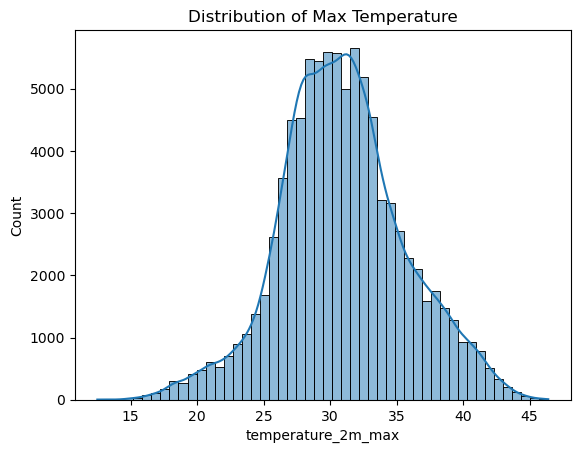

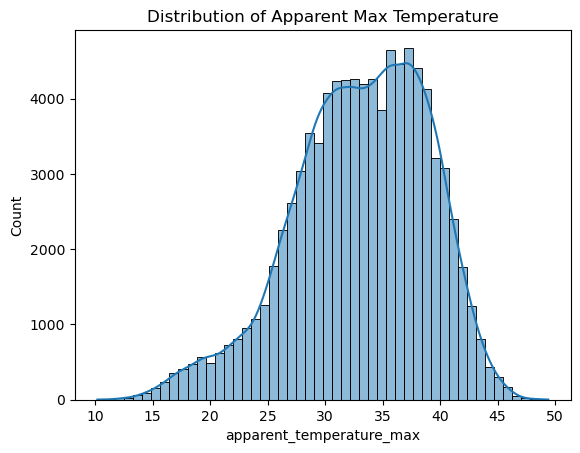

In [7]:
# Temperature distribution
sns.histplot(df['temperature_2m_max'], bins=50, kde=True)
plt.title("Distribution of Max Temperature")
plt.show()

sns.histplot(df['apparent_temperature_max'], bins=50, kde=True)
plt.title("Distribution of Apparent Max Temperature")
plt.show()

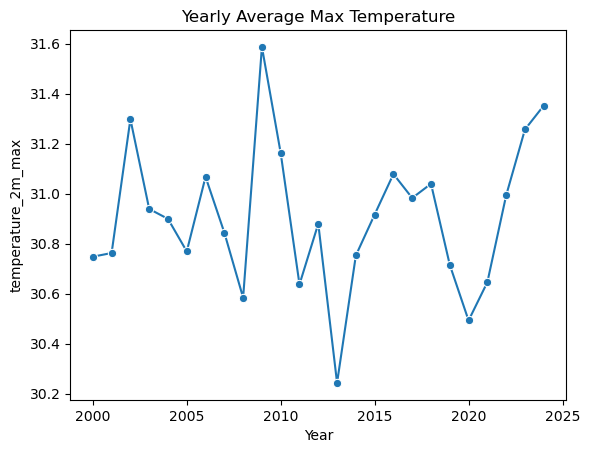

In [8]:
# yearly Average tempearature
yearly_avg = df.groupby('Year')['temperature_2m_max'].mean().reset_index()
sns.lineplot(data=yearly_avg, x='Year', y='temperature_2m_max', marker='o')
plt.title("Yearly Average Max Temperature")
plt.show()

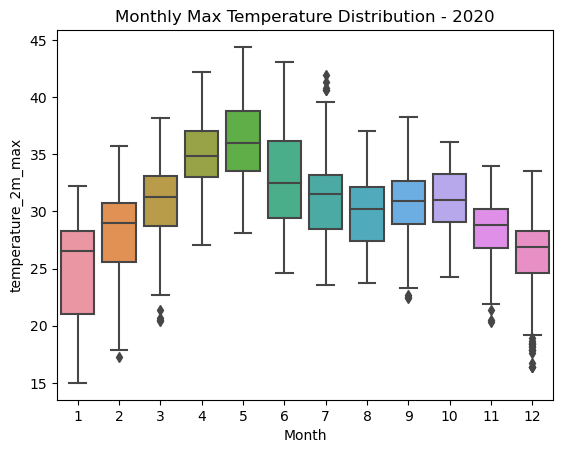

In [9]:
# monthly max temperature
year_data = df[df['Year'] == 2020]
# Boxplot for daily max temps by month
sns.boxplot(x='Month', y='temperature_2m_max', data=year_data)
plt.title("Monthly Max Temperature Distribution - 2020")
plt.show()

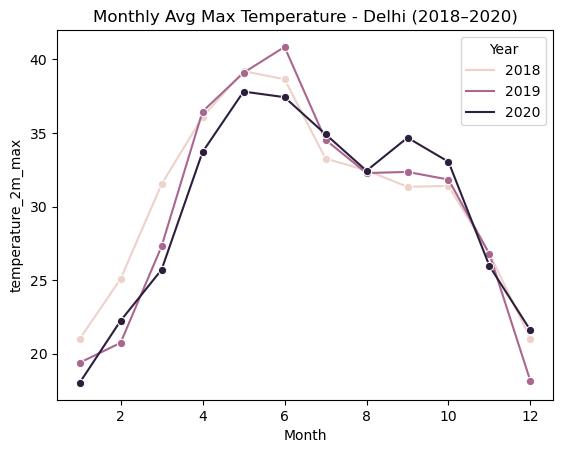

In [10]:
#monthly avg max temperature
city_data = df[(df['city'] == 'Delhi') & (df['Year'].isin([2018, 2019, 2020]))]  
monthly_avg = city_data.groupby(['Year','Month'])['temperature_2m_max'].mean().reset_index()
sns.lineplot(data=monthly_avg, x='Month', y='temperature_2m_max', hue='Year', marker="o")
plt.title("Monthly Avg Max Temperature - Delhi (2018–2020)")
plt.show()

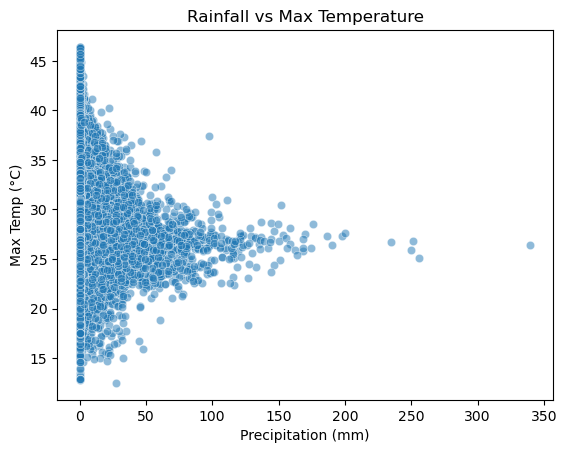

In [11]:
#temperature vs rain fall
sns.scatterplot(x="precipitation_sum", y="temperature_2m_max", data=df, alpha=0.5)
plt.title("Rainfall vs Max Temperature")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Max Temp (°C)")
plt.show()


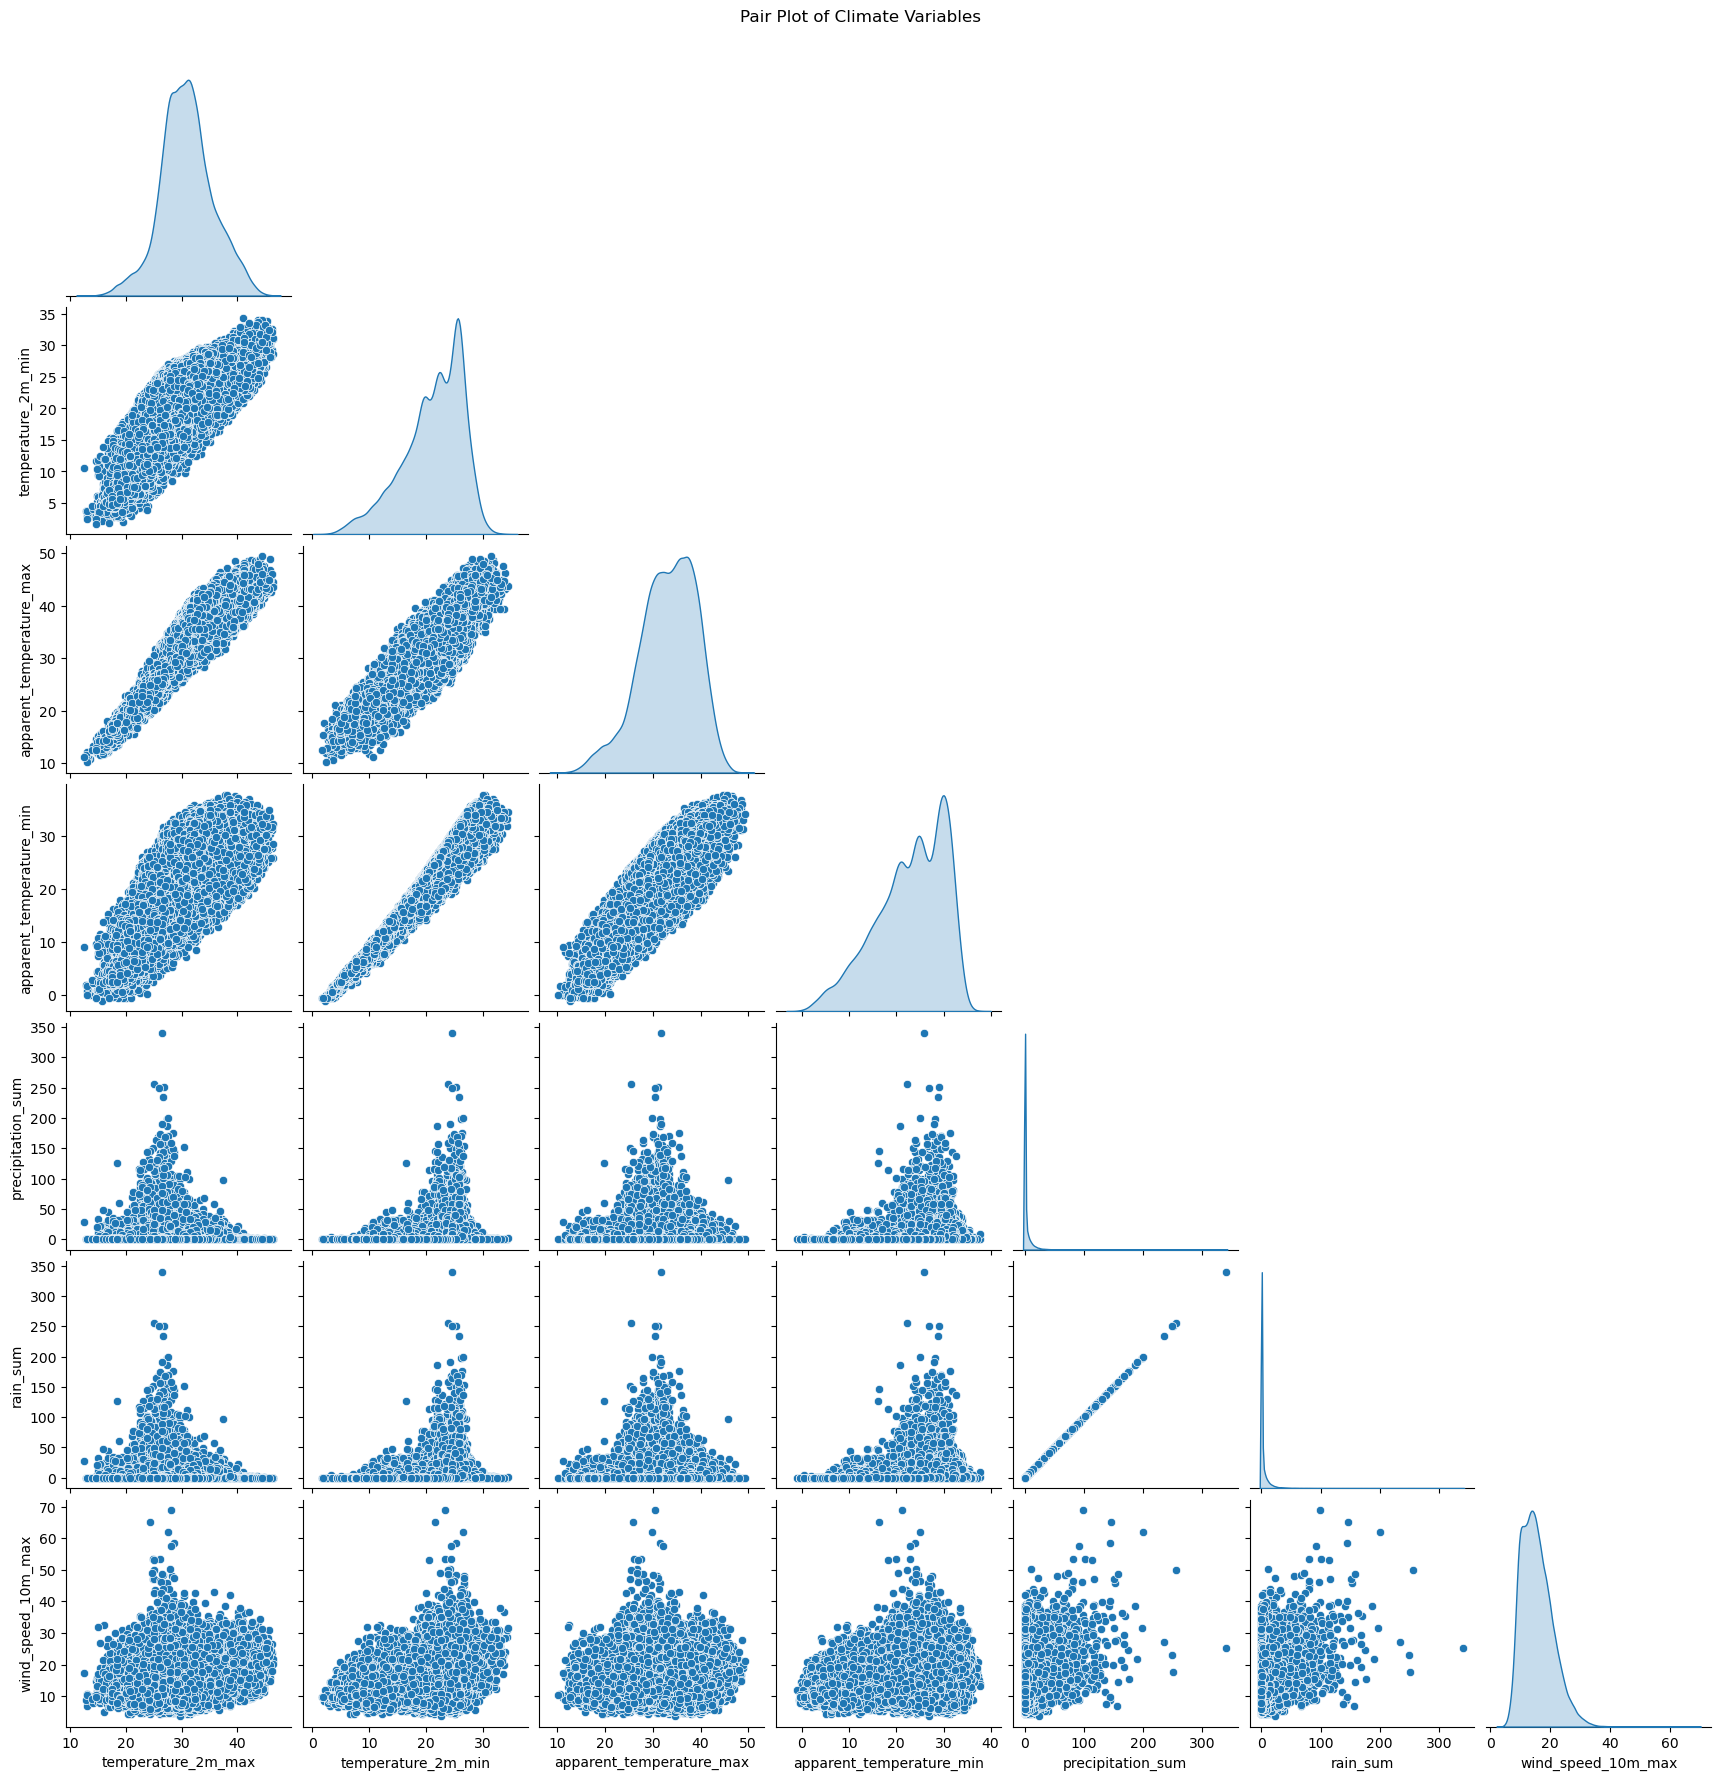

In [12]:
# Select relevant numeric columns
num_cols = ["temperature_2m_max", "temperature_2m_min", 
            "apparent_temperature_max", "apparent_temperature_min", 
            "precipitation_sum", "rain_sum", "wind_speed_10m_max"]

# Pair plot
sns.pairplot(df[num_cols], diag_kind="kde", corner=True)
plt.suptitle("Pair Plot of Climate Variables", y=1.02)
plt.show()


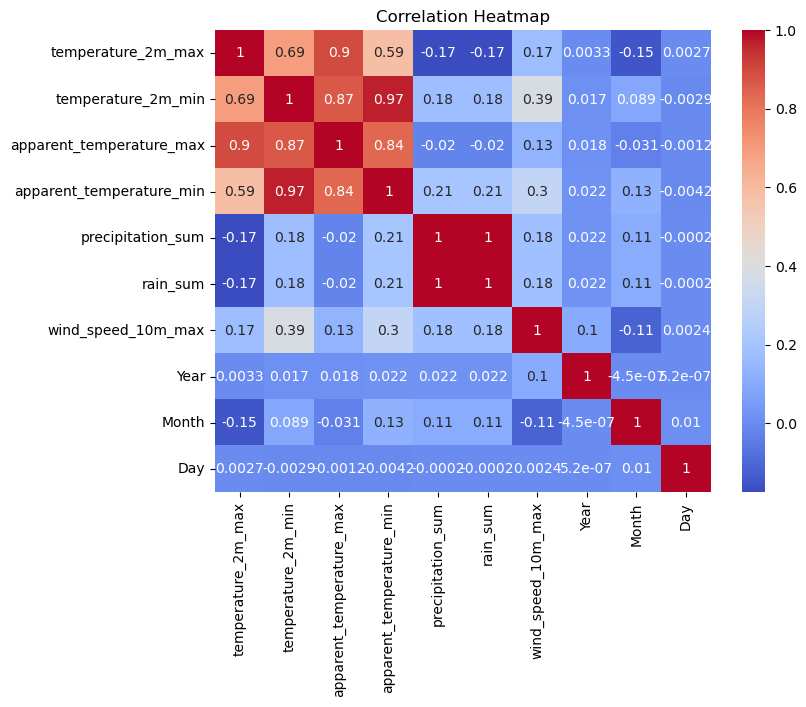

In [13]:
# correlation map
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [14]:
# Create encoder
le = LabelEncoder()
# Fit + transform City column
df['city'] = le.fit_transform(df['city'])
df.head()

,city,date,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,wind_speed_10m_max,Year,Month,Day
0,3,2004-01-01,17.6,5.0,16.9,3.5,0.0,0.0,8.8,2004,1,1
1,3,2004-01-02,17.8,5.3,16.0,3.4,0.0,0.0,10.8,2004,1,2
2,3,2004-01-03,16.7,6.3,14.6,4.1,0.0,0.0,12.2,2004,1,3
3,3,2004-01-04,15.8,4.2,13.3,1.5,0.0,0.0,12.3,2004,1,4
4,3,2004-01-05,15.4,5.2,14.3,3.1,0.0,0.0,9.6,2004,1,5


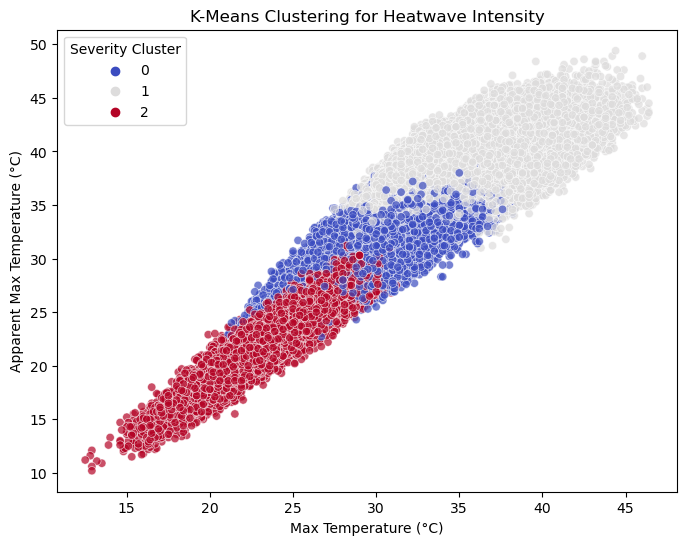

0    38207
1    36551
2    15101
Name: Severity, dtype: int64


In [44]:
from sklearn.cluster import KMeans

# Select only the important features for heatwaves
features = df[["temperature_2m_max", "temperature_2m_min",
               "apparent_temperature_max", "apparent_temperature_min",
               "wind_speed_10m_max"]]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Severity"] = kmeans.fit_predict(X_scaled)

# Visualize using max vs apparent max temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["temperature_2m_max"],
    y=df["apparent_temperature_max"],
    hue=df["Severity"],
    palette="coolwarm",
    alpha=0.7
)
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Apparent Max Temperature (°C)")
plt.title("K-Means Clustering for Heatwave Intensity")
plt.legend(title="Severity Cluster")
plt.show()

# Cluster counts
print(df["Severity"].value_counts())


In [51]:
df.head()

,city,date,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,wind_speed_10m_max,Year,Month,Day,Severity
0,3,2004-01-01,17.6,5.0,16.9,3.5,0.0,0.0,8.8,2004,1,1,2
1,3,2004-01-02,17.8,5.3,16.0,3.4,0.0,0.0,10.8,2004,1,2,2
2,3,2004-01-03,16.7,6.3,14.6,4.1,0.0,0.0,12.2,2004,1,3,2
3,3,2004-01-04,15.8,4.2,13.3,1.5,0.0,0.0,12.3,2004,1,4,2
4,3,2004-01-05,15.4,5.2,14.3,3.1,0.0,0.0,9.6,2004,1,5,2


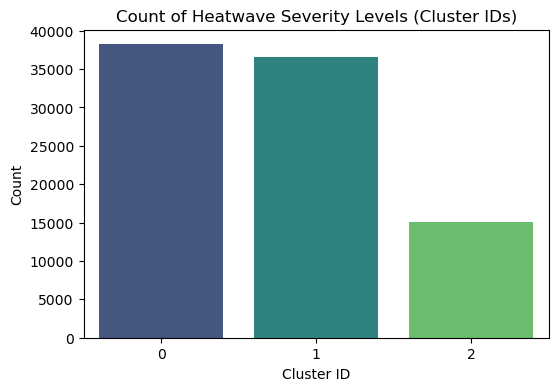

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(x="Severity", data=df, palette="viridis")

plt.title("Count of Heatwave Severity Levels (Cluster IDs)")
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.show()

In [53]:
# Assuming 'label' is the target variable
target_column = 'Severity'

# Define X and Y
x = df.drop(columns=[target_column])
y = df[target_column]

In [54]:
x

,city,date,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,wind_speed_10m_max,Year,Month,Day
0,3,2004-01-01,17.6,5.0,16.9,3.5,0.0,0.0,8.8,2004,1,1
1,3,2004-01-02,17.8,5.3,16.0,3.4,0.0,0.0,10.8,2004,1,2
2,3,2004-01-03,16.7,6.3,14.6,4.1,0.0,0.0,12.2,2004,1,3
3,3,2004-01-04,15.8,4.2,13.3,1.5,0.0,0.0,12.3,2004,1,4
4,3,2004-01-05,15.4,5.2,14.3,3.1,0.0,0.0,9.6,2004,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
89854,7,2024-12-27,25.6,13.9,25.9,13.7,0.0,0.0,10.1,2024,12,27
89855,7,2024-12-28,22.4,15.9,21.7,15.7,0.5,0.5,16.5,2024,12,28
89856,7,2024-12-29,22.8,13.5,22.9,13.9,0.3,0.3,12.3,2024,12,29
89857,7,2024-12-30,20.8,12.4,20.1,12.0,0.0,0.0,11.5,2024,12,30


In [56]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=44 )

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((71887, 12), (17972, 12), (71887,), (17972,))